<a href="https://colab.research.google.com/github/Jayaprakash1710/Module-20-Neural-Networks/blob/main/Lec_6_Tensorflow_and_Keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Dataset link:

https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU

In [2]:
!gdown 1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU

Downloading...
From: https://drive.google.com/uc?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
To: /content/healthyfime_tfkeras.csv
100% 762k/762k [00:00<00:00, 79.1MB/s]


In [3]:
df=pd.read_csv('healthyfime_tfkeras.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df.shape

(13393, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


<Axes: xlabel='count', ylabel='gender'>

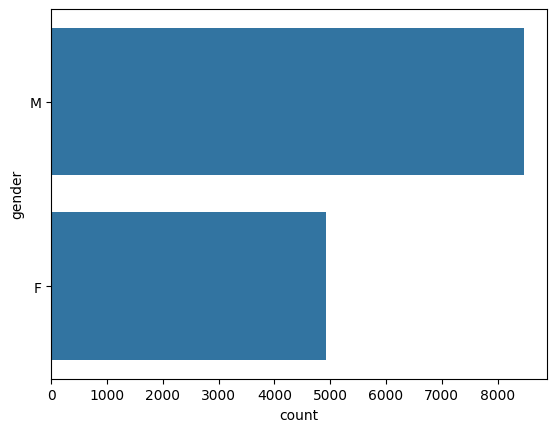

In [6]:
sns.countplot(df['gender'])

<Axes: xlabel='count', ylabel='class'>

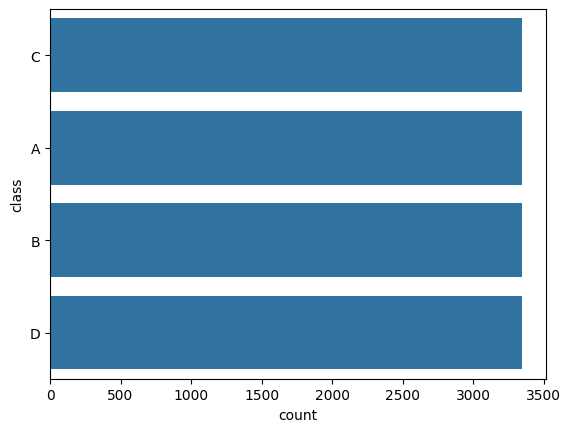

In [7]:
sns.countplot(df['class'])

In [8]:
df['class'].value_counts()

,count
class,
C,3349
D,3349
A,3348
B,3347


In [9]:
df['gender'].replace({'M':0,'F':1},inplace=True)
df.head()

<ipython-input-9-b1a255a00aff>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'M':0,'F':1},inplace=True)
<ipython-input-9-b1a255a00aff>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'M':0,'F':1},inplace=True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [10]:
classes=df['class'].unique()
class_code={}
for i in range(len(classes)):
  if classes[i] not in class_code:
    class_code[classes[i]]=i

In [11]:
class_code

{'C': 0, 'A': 1, 'B': 2, 'D': 3}

In [12]:
df['class']=df['class'].map(class_code)

In [13]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [14]:
df['class'].value_counts()

,count
class,
0,3349
3,3349
1,3348
2,3347


<Axes: >

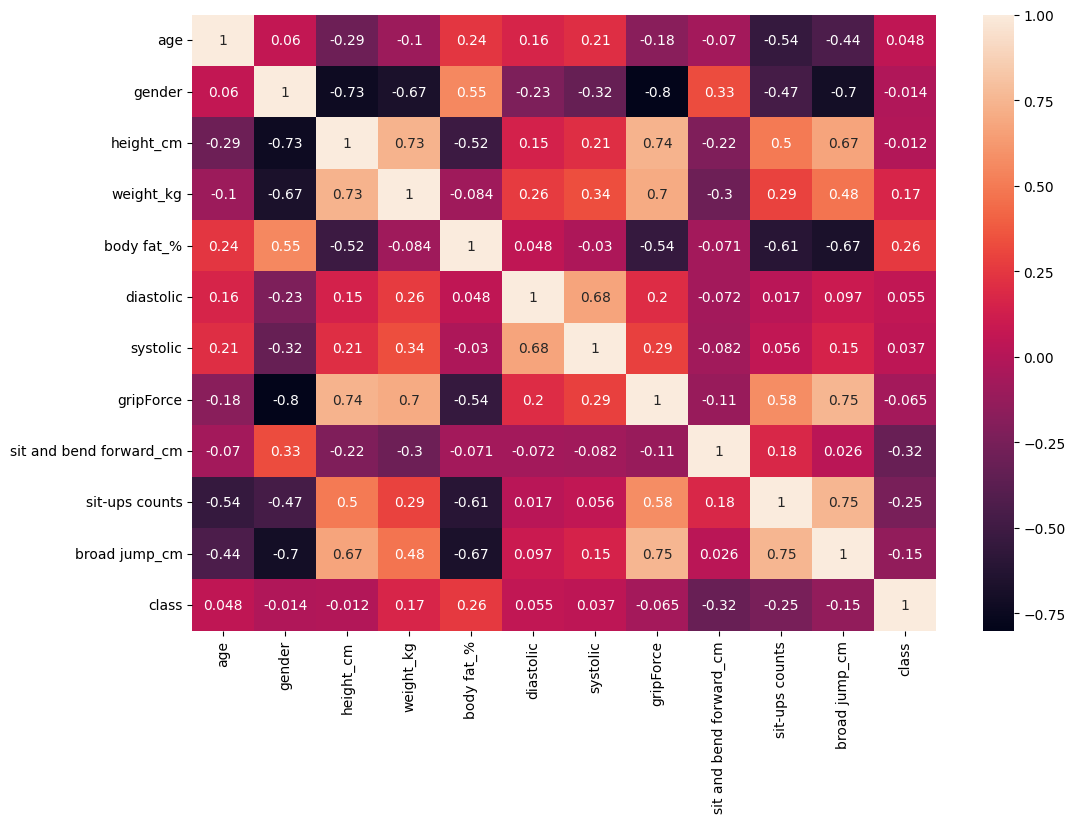

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: >

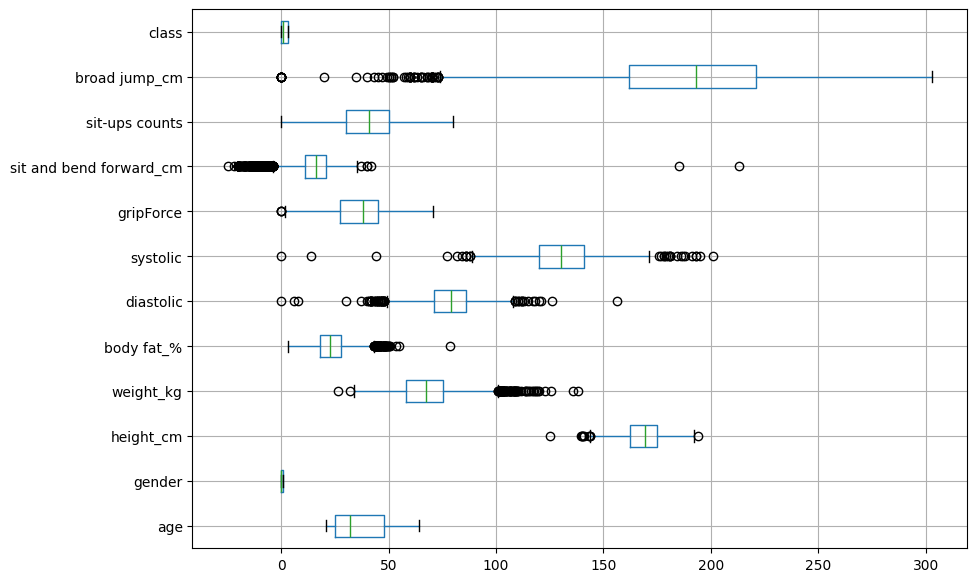

In [16]:
plt.figure(figsize=(10,7))
df.boxplot(vert=False)

# Data Preparation of model training:

X and y:

In [17]:
X=df.iloc[::,:-1]
y=df.iloc[::,-1]
print(X.shape,y.shape)

(13393, 11) (13393,)


Splitting for training,validation and testing:

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
X_dev,X_test,y_dev,y_test=tts(X,y,test_size=0.1,random_state=42)
X_train,X_val,y_train,y_val=tts(X_dev,y_dev,test_size=0.1,random_state=42)

print(f'Train:{X_train.shape},{y_train.shape}')
print(f'Valid:{X_val.shape},{y_val.shape}')
print(f'Test:{X_test.shape},{y_test.shape}')

Train:(10847, 11),(10847,)
Valid:(1206, 11),(1206,)
Test:(1340, 11),(1340,)


Scaling:

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
Scaler=StandardScaler()

In [22]:
X_train=Scaler.fit_transform(X_train)
X_val=Scaler.transform(X_val)
X_test=Scaler.transform(X_test)

<Axes: >

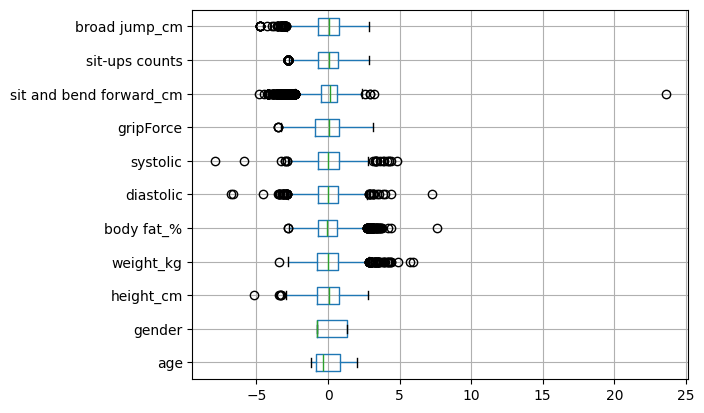

In [24]:
pd.DataFrame(X_train,columns=df.columns[:-1]).boxplot(rot=0,vert=False)

# Tensorflow:

In [25]:
import tensorflow as tf

In [27]:
tf.__version__

'2.18.0'

In [28]:
dir(tf.keras)

['DTypePolicy',
 'FloatDTypePolicy',
 'Function',
 'Initializer',
 'Input',
 'InputSpec',
 'KerasTensor',
 'Layer',
 'Loss',
 'Metric',
 'Model',
 'Operation',
 'Optimizer',
 'Quantizer',
 'Regularizer',
 'Sequential',
 'StatelessScope',
 'SymbolicScope',
 'Variable',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'config',
 'constraints',
 'datasets',
 'device',
 'distribution',
 'dtype_policies',
 'export',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'name_scope',
 'ops',
 'optimizers',
 'preprocessing',
 'quantizers',
 'random',
 'regularizers',
 'tree',
 'utils',
 'version',
 'visualization',
 'wrappers']

In [31]:
dir(tf.keras.Loss)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_obj_type',
 '_unpickle_model',
 'call',
 'dtype',
 'from_config',
 'get_config']

In [32]:
dir(tf.keras.Metric)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_check_super_called',
 '_obj_type',
 '_unpickle_model',
 'add_variable',
 'add_weight',
 'dtype',
 'from_config',
 'get_config',
 'reset_state',
 'result',
 'stateless_reset_state',
 'stateless_result',
 'stateless_update_state',
 'update_state',
 'variables']

Sequential API:

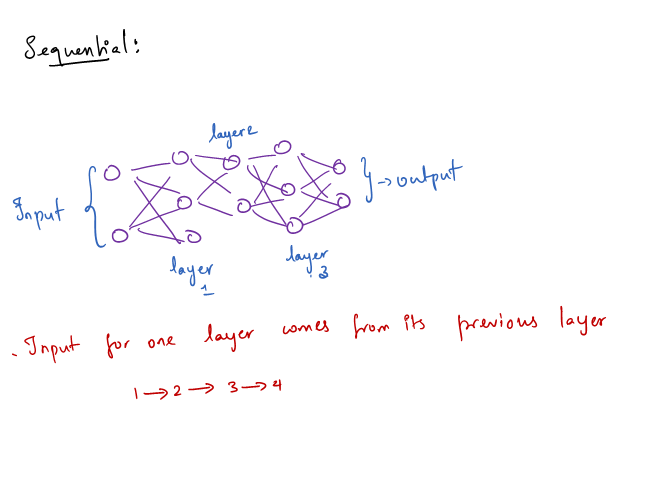

Functional API:

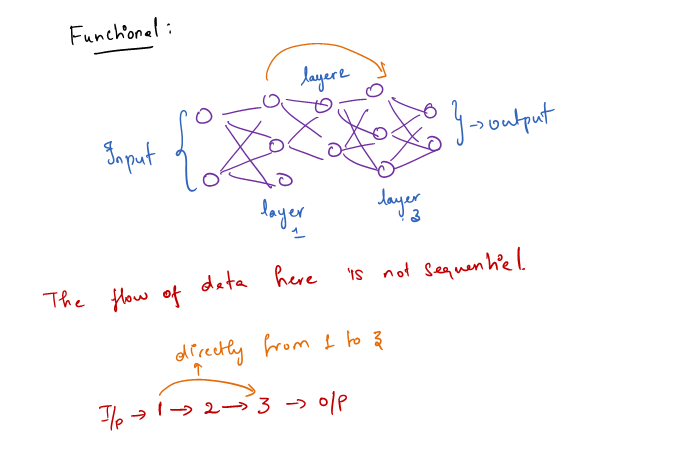